### Part 1 ：Load, clean, and perform initial Exploratory Data Analysis (EDA) on house_dataset.csv.   
- Establish the strict train/test split and the cross-validation strategy.   
- Develop a simple baseline linear model (e.g., OLS with basic numerical features) to set an initial performance mark.
- Handoff: Provide the cleaned training data, test data, CV framework code, and baseline model results.


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error

### Load and Clean Data

In [63]:
df = pd.read_csv("house_dataset.csv")
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [64]:
df['date'] = pd.to_datetime(df['date'])
#df['year_sold'] = df['date'].dt.year
#df['month_sold'] = df['date'].dt.month
df = df.drop_duplicates() # To remove rows that are 100% identical to earlier rows
df = df.dropna() # Drop rows with any missing values
df = df[df['price'] >= 10000]  #get rid of the rows with price less than 10,000 as it is unlikely to be a real house price
print(df.shape)

(4552, 18)


### EDA

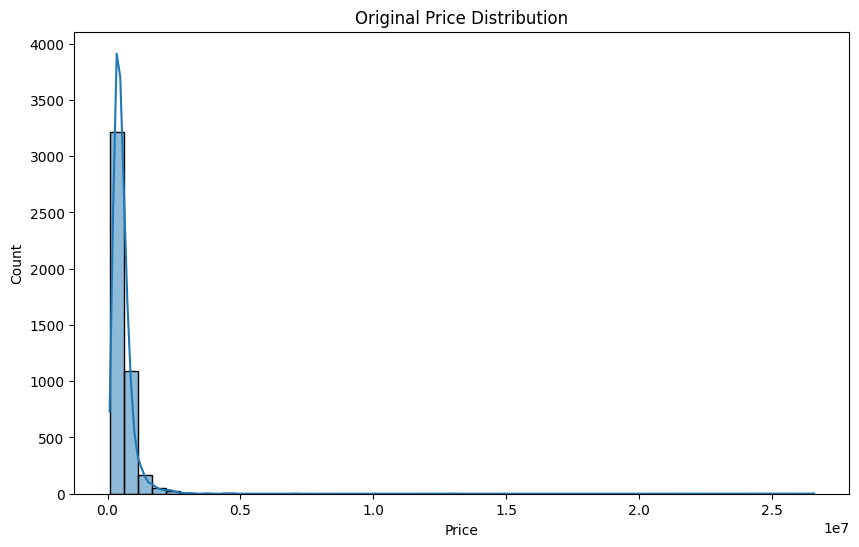

In [65]:
# Step 1: Visualize Price Distribution
# Plot histogram of price (original scale)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Original Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

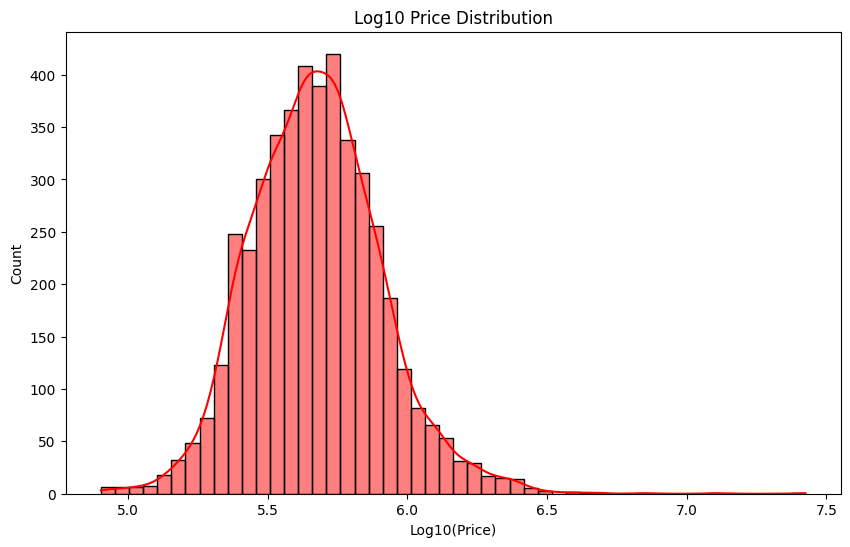

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,log10_price
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,5.495544
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,6.377306
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5.534026
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5.623249
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,5.740363


In [66]:
# Step 2: Apply log transformation to target variable (price)
# ------------------------------------------------------------
# The original price distribution is highly right-skewed.
#  a histogram of the log10 of the price, to see if it is more normally distributed
plt.figure(figsize=(10, 6))
sns.histplot(np.log10(df['price']), bins=50, kde=True, color='red')

# label axis and title
plt.title("Log10 Price Distribution")
plt.xlabel("Log10(Price)")
plt.ylabel("Count")
plt.show()

# Applying a log10 transform can reduce skewness and stabilize variance,
# define a new column "log10_price" which is the log10 of the price
df['log10_price'] = np.log10(df['price'])
df.head() # to check the newly created column

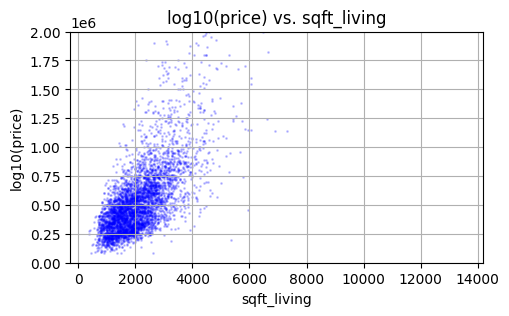

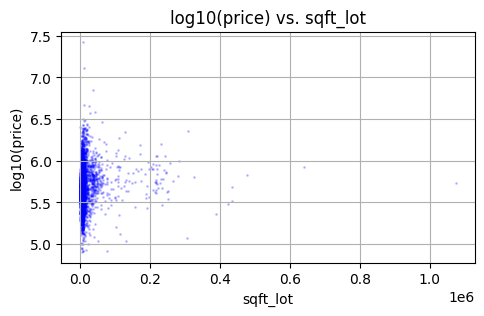

<Figure size 533.333x300 with 0 Axes>

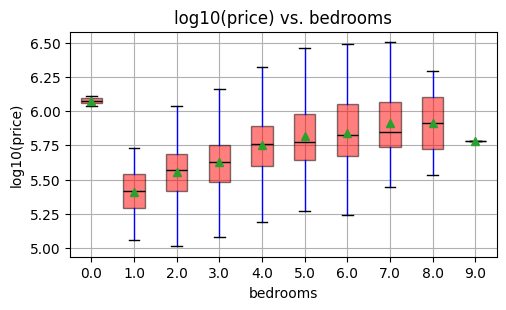

<Figure size 533.333x300 with 0 Axes>

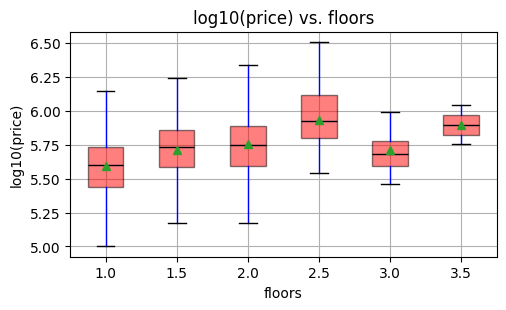

<Figure size 533.333x300 with 0 Axes>

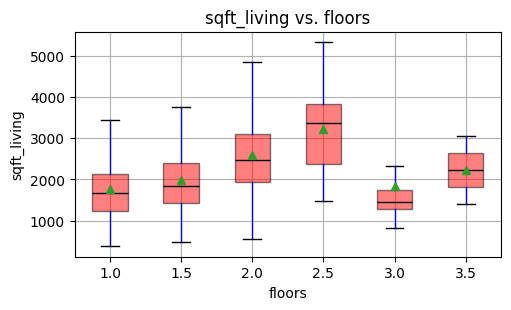

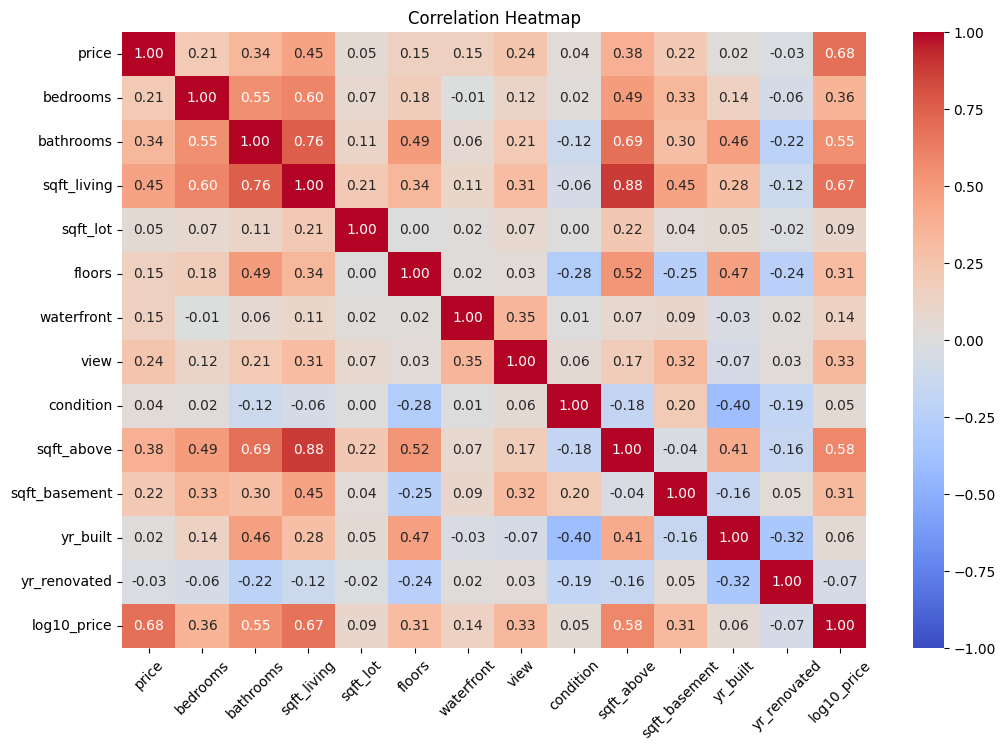

In [67]:
# plot scatter plots of log10(price) vs. sqft_living
plt.figure(figsize=(16/3., 9/3.)) # set aspect ratio to 16:9
plt.scatter(df['sqft_living'], df['price'], 
            color='blue', alpha=0.2, s=1)
plt.grid(True)

# label axis and title
plt.xlabel('sqft_living')
plt.ylabel('log10(price)')
plt.title('log10(price) vs. sqft_living')

plt.ylim(0, 2_000_000)

# ------------------------------------------------------------

# do the same, but with log10(price) vs. sqft_lot
plt.figure(figsize=(16/3., 9/3.)) # set aspect ratio to 16:9
plt.scatter(df['sqft_lot'], df['log10_price'], 
            color='blue', alpha=0.2, s=1)
plt.grid(True)

# label axis and title
plt.xlabel('sqft_lot')
plt.ylabel('log10(price)')
plt.title('log10(price) vs. sqft_lot')

# ------------------------------------------------------------

# let's plot boxplots of log10(price) vs. bedrooms
plt.figure(figsize=(16/3., 9/3.)) # set aspect ratio to 16:9
# plot the boxplot, grouped by the number of bedrooms

_ = df.boxplot(column='log10_price', by='bedrooms', 
                 showfliers=False,
                 showmeans=True,
                 showcaps=True, 
                 patch_artist=True, 
                 boxprops=dict(facecolor='red', alpha=0.5),
                 whiskerprops=dict(color='blue'),
                 medianprops=dict(color='black'),
                 figsize=(16/3., 9/3.),
                 )
# erase all default titles
plt.suptitle('')
plt.title('')
plt.grid(True)

# label axis and title
plt.xlabel('bedrooms')
plt.ylabel('log10(price)')
plt.title('log10(price) vs. bedrooms')

# ------------------------------------------------------------
# do a similar boxplot for the number of floors
plt.figure(figsize=(16/3., 9/3.)) # set aspect ratio to 16:9

# plot the boxplot, grouped by the number of floors
_ = df.boxplot(column='log10_price', by='floors', 
                 showfliers=False,
                 showmeans=True,
                 showcaps=True, 
                 patch_artist=True, 
                 boxprops=dict(facecolor='red', alpha=0.5),
                 whiskerprops=dict(color='blue'),
                 medianprops=dict(color='black'),
                 figsize=(16/3., 9/3.),
                 )
# erase all default titles
plt.suptitle('')
plt.title('')
plt.grid(True)

# label axis and title
plt.xlabel('floors')
plt.ylabel('log10(price)')
plt.title('log10(price) vs. floors')

# ------------------------------------------------------------
# let's study the correlation between the number of floors and the size of the living area
plt.figure(figsize=(16/3., 9/3.)) # set aspect ratio to 16:9

# let's again do a boxplot, but this time with the size of the living area
_ = df.boxplot(column='sqft_living', by='floors', 
                 showfliers=False,
                 showmeans=True,
                 showcaps=True, 
                 patch_artist=True, 
                 boxprops=dict(facecolor='red', alpha=0.5),
                 whiskerprops=dict(color='blue'),
                 medianprops=dict(color='black'),
                 figsize=(16/3., 9/3.),
                 )
# erase all default titles
plt.suptitle('')
plt.title('')
plt.grid(True)

# label axis and title
plt.xlabel('floors')
plt.ylabel('sqft_living')
plt.title('sqft_living vs. floors')

# ------------------------------------------------------------
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
# to set the color bar from -1 to 1

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.title("Correlation Heatmap")
plt.show()

### Split into Train/Test

### Define Cross-validation strategy

In [68]:
# In this step, we will:
# 1. Define a set of simple baseline features (numerical only)
# 2. Split the data into training and test sets
# 3. Define a cross-validation strategy (5-fold CV)
# 4. Fit a baseline OLS model on the training data
# 5. Evaluate model performance using MAPE (on CV and test set)

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# 1. Define baseline features (only numerical features used for now)
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
            'floors', 'waterfront', 'view', 'condition',
            'sqft_above', 'sqft_basement','yr_built', 'yr_renovated']

X = df[features]                  # Input features
y = df['log10_price']            # Target variable (log-transformed price)

# 2. Perform a strict train/test split (20% test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Define a 5-fold cross-validation strategy with shuffling
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Fit a baseline linear regression model (OLS)
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# 5. Evaluate model performance using MAPE
# Cross-validation (on training set)
def evaluate_cv_mape(model, X, y, cv):
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_percentage_error', cv=cv)
    return -scores.mean() * 100
cv_mape = evaluate_cv_mape(baseline_model, X_train, y_train, cv)
print(f"Cross-Validation MAPE: {cv_mape:.2f}%")

# Evaluate on held-out test set
y_pred_log_test = baseline_model.predict(X_test)
y_pred_test = 10 ** y_pred_log_test           # Convert back to original scale
y_test_true = 10 ** y_test

test_mape = mean_absolute_percentage_error(y_test_true, y_pred_test) * 100
print(f"Test MAPE: {test_mape:.2f}%")


Cross-Validation MAPE: 2.19%
Test MAPE: 34.88%


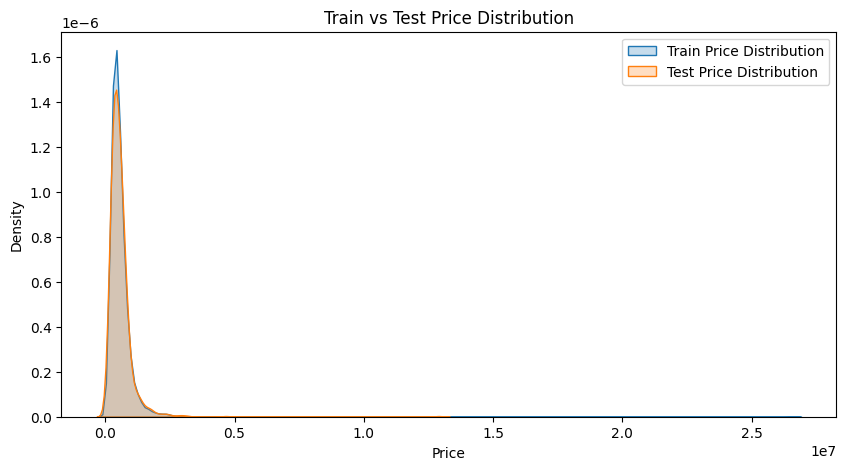

In [69]:
# To ensure a representative and fair train/test split, we visualized the price distributions across both sets. 
# Compare price distributions
plt.figure(figsize=(10,5))
sns.kdeplot(10**y_train, label='Train Price Distribution', fill=True)
sns.kdeplot(10**y_test, label='Test Price Distribution', fill=True)
plt.legend()
plt.xlabel("Price")
plt.title("Train vs Test Price Distribution")
plt.show()
# Kernel density plots showed that the two distributions are highly similar, indicating no evidence of distributional shift.